In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy.stats import boxcox,yeojohnson

import warnings
warnings.filterwarnings('ignore')

import pickle
import json


### problem statement

Find out Data Science salary in USD

### Data Gathering

In [2]:
df=pd.read_csv("Data_Science_Jobs_Salaries.csv")
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S
...,...,...,...,...,...,...,...,...,...,...,...
240,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
241,2021e,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
242,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
243,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [3]:
df.shape

(245, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           245 non-null    object
 1   experience_level    245 non-null    object
 2   employment_type     245 non-null    object
 3   job_title           245 non-null    object
 4   salary              245 non-null    int64 
 5   salary_currency     245 non-null    object
 6   salary_in_usd       245 non-null    int64 
 7   employee_residence  245 non-null    object
 8   remote_ratio        245 non-null    int64 
 9   company_location    245 non-null    object
 10  company_size        245 non-null    object
dtypes: int64(3), object(8)
memory usage: 21.2+ KB


In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df['work_year'].value_counts().to_dict()#replace
df['work_year'].replace({'2021e': 2021, '2020': 2020},inplace=True)

In [7]:
df['experience_level'].value_counts().to_dict()#replace
df['experience_level'].replace({'MI': 3, 'SE': 2, 'EN': 1, 'EX': 0},inplace=True)

In [8]:
df['employment_type'].value_counts().to_dict() #replace
df['employment_type'].replace({'FT': 3, 'PT': 2, 'CT': 1, 'FL': 0},inplace=True)

In [9]:
df=pd.get_dummies(df,columns=['job_title'])
df

,work_year,experience_level,employment_type,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,...,job_title_Machine Learning Infrastructure Engineer,job_title_Machine Learning Scientist,job_title_Manager Data Science,job_title_Marketing Data Analyst,job_title_Principal Data Analyst,job_title_Principal Data Engineer,job_title_Principal Data Scientist,job_title_Product Data Analyst,job_title_Research Scientist,job_title_Staff Data Scientist
0,2021,1,3,54000,EUR,64369,DE,50,DE,L,...,0,0,0,0,0,0,0,0,0,0
1,2020,2,3,60000,EUR,68428,GR,100,US,L,...,0,0,0,0,0,0,0,0,0,0
2,2021,0,3,85000,USD,85000,RU,0,RU,M,...,0,0,0,0,0,0,0,0,0,0
3,2021,0,3,230000,USD,230000,RU,50,RU,L,...,0,0,0,0,0,0,0,0,0,0
4,2021,1,3,125000,USD,125000,US,100,US,S,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2020,2,3,412000,USD,412000,US,100,US,L,...,0,0,0,0,0,0,0,0,0,0
241,2021,3,3,151000,USD,151000,US,100,US,L,...,0,0,0,0,0,0,1,0,0,0
242,2020,1,3,105000,USD,105000,US,100,US,S,...,0,0,0,0,0,0,0,0,0,0
243,2020,1,1,100000,USD,100000,US,100,US,L,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df=pd.get_dummies(df,columns=['salary_currency'])
df

,work_year,experience_level,employment_type,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,job_title_3D Computer Vision Researcher,...,salary_currency_EUR,salary_currency_GBP,salary_currency_HUF,salary_currency_INR,salary_currency_JPY,salary_currency_MXN,salary_currency_PLN,salary_currency_SGD,salary_currency_TRY,salary_currency_USD
0,2021,1,3,54000,64369,DE,50,DE,L,0,...,1,0,0,0,0,0,0,0,0,0
1,2020,2,3,60000,68428,GR,100,US,L,0,...,1,0,0,0,0,0,0,0,0,0
2,2021,0,3,85000,85000,RU,0,RU,M,0,...,0,0,0,0,0,0,0,0,0,1
3,2021,0,3,230000,230000,RU,50,RU,L,0,...,0,0,0,0,0,0,0,0,0,1
4,2021,1,3,125000,125000,US,100,US,S,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2020,2,3,412000,412000,US,100,US,L,0,...,0,0,0,0,0,0,0,0,0,1
241,2021,3,3,151000,151000,US,100,US,L,0,...,0,0,0,0,0,0,0,0,0,1
242,2020,1,3,105000,105000,US,100,US,S,0,...,0,0,0,0,0,0,0,0,0,1
243,2020,1,1,100000,100000,US,100,US,L,0,...,0,0,0,0,0,0,0,0,0,1


In [11]:
df['salary_in_usd'].value_counts().to_dict()  #continious data and int

{150000: 5,
 90000: 4,
 100000: 4,
 110000: 4,
 200000: 4,
 115000: 3,
 85000: 3,
 12000: 3,
 120000: 3,
 50000: 3,
 165000: 3,
 77481: 3,
 89402: 3,
 105000: 3,
 160000: 3,
 80000: 3,
 64369: 2,
 79833: 2,
 235000: 2,
 170000: 2,
 225000: 2,
 135000: 2,
 62726: 2,
 174000: 2,
 6072: 2,
 185000: 2,
 70329: 2,
 91500: 2,
 4000: 2,
 140000: 2,
 25032: 2,
 450000: 2,
 125000: 2,
 60000: 2,
 59601: 2,
 56000: 1,
 56578: 1,
 2876: 1,
 61985: 1,
 195000: 1,
 38144: 1,
 416000: 1,
 33899: 1,
 5707: 1,
 40798: 1,
 28608: 1,
 47129: 1,
 8000: 1,
 41689: 1,
 114047: 1,
 117583: 1,
 18102: 1,
 412000: 1,
 423000: 1,
 54238: 1,
 24407: 1,
 9272: 1,
 147000: 1,
 96357: 1,
 21844: 1,
 51321: 1,
 40481: 1,
 151000: 1,
 39916: 1,
 87000: 1,
 26224: 1,
 22671: 1,
 5695: 1,
 81000: 1,
 28850: 1,
 47899: 1,
 43331: 1,
 62250: 1,
 74000: 1,
 152000: 1,
 18000: 1,
 130000: 1,
 190200: 1,
 19052: 1,
 45773: 1,
 73000: 1,
 62000: 1,
 75000: 1,
 175228: 1,
 19661: 1,
 148261: 1,
 91237: 1,
 38776: 1,
 118000:

In [12]:
df=pd.get_dummies(df,columns=['employee_residence'])

In [13]:
df=pd.get_dummies(df,columns=['company_location'])

In [14]:
df['remote_ratio'].value_counts().to_dict()

{100: 134, 50: 71, 0: 40}

In [15]:
df['company_size'].value_counts().to_dict() #replace
df['company_size'].replace({'L': 2, 'S': 0, 'M': 1},inplace=True)

In [16]:
df.corr()

,work_year,experience_level,employment_type,salary,salary_in_usd,remote_ratio,company_size,job_title_3D Computer Vision Researcher,job_title_AI Scientist,job_title_Applied Data Scientist,...,company_location_PK,company_location_PL,company_location_PT,company_location_RU,company_location_SG,company_location_SI,company_location_TR,company_location_UA,company_location_US,company_location_VN
work_year,1.000000,-0.017668,0.011155,0.024407,0.006934,0.065262,0.132738,0.038873,0.022575,0.038873,...,-0.047159,0.067608,-0.047159,0.055088,0.038873,0.038873,0.067608,0.038873,0.001740,0.038873
experience_level,-0.017668,1.000000,0.037523,0.069267,-0.112154,-0.068731,0.158310,0.063361,-0.146131,0.063361,...,0.089790,-0.013648,0.039334,-0.212941,0.063361,0.063361,0.068915,-0.079055,0.019184,-0.079055
employment_type,0.011155,0.037523,1.000000,0.037920,0.019060,-0.034437,0.092294,-0.130945,-0.098856,0.014220,...,-0.288422,0.024732,0.020152,0.020152,0.014220,0.014220,0.024732,0.014220,-0.101045,0.014220
salary,0.024407,0.069267,0.037920,1.000000,-0.087365,-0.004775,0.101442,-0.002890,-0.010150,-0.012246,...,-0.019671,-0.017770,-0.018165,-0.013780,-0.010781,-0.013571,-0.015842,-0.013785,-0.084372,-0.014050
salary_in_usd,0.006934,-0.112154,0.019060,-0.087365,1.000000,0.171240,0.177583,-0.072141,-0.122736,-0.034748,...,-0.097277,-0.030427,-0.047783,0.062384,-0.007909,-0.057162,-0.103761,-0.066047,0.478742,-0.073227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
company_location_SI,0.038873,0.063361,0.014220,-0.013571,-0.057162,-0.032735,0.054015,-0.004098,-0.009240,-0.004098,...,-0.005808,-0.007128,-0.005808,-0.005808,-0.004098,1.000000,-0.007128,-0.004098,-0.056840,-0.004098
company_location_TR,0.067608,0.068915,0.024732,-0.015842,-0.103761,-0.056933,0.004212,-0.007128,-0.016071,-0.007128,...,-0.010101,-0.012397,-0.010101,-0.010101,-0.007128,-0.007128,1.000000,-0.007128,-0.098856,-0.007128
company_location_UA,0.038873,-0.079055,0.014220,-0.013785,-0.066047,0.052585,0.054015,-0.004098,-0.009240,-0.004098,...,-0.005808,-0.007128,-0.005808,-0.005808,-0.004098,-0.004098,-0.007128,1.000000,-0.056840,-0.004098
company_location_US,0.001740,0.019184,-0.101045,-0.084372,0.478742,0.280085,0.103155,-0.056840,-0.011866,-0.056840,...,-0.080550,-0.098856,-0.080550,-0.080550,-0.056840,-0.056840,-0.098856,-0.056840,1.000000,-0.056840


<AxesSubplot:xlabel='salary'>

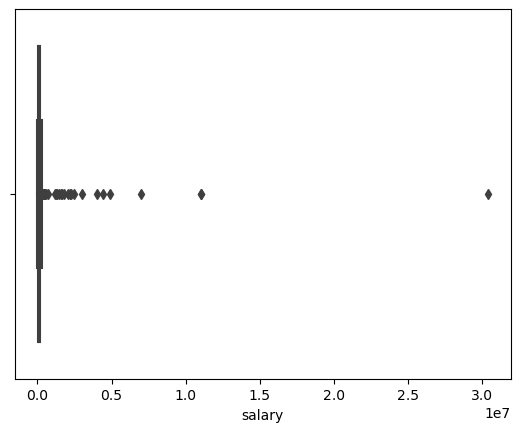

In [17]:
sns.boxplot(x=df["salary"])

<AxesSubplot:xlabel='salary', ylabel='Density'>

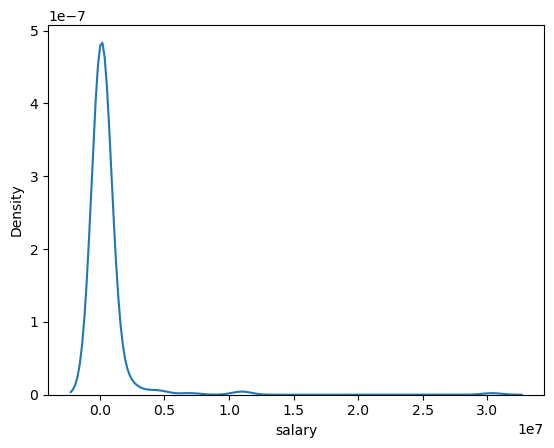

In [18]:
sns.kdeplot(df['salary'])

In [19]:
df["salary"].skew()  # positive skew data

10.346941222539135

In [20]:
q1=np.quantile(df['salary'],0.25)
q2=np.quantile(df["salary"],0.50)
q3=np.quantile(df["salary"],0.75)
IQR=q3-q1
upper_tail=q3+1.5*IQR
lower_tail=q1-1.5*IQR

In [21]:
df["salary"]=np.where(df["salary"]>upper_tail,upper_tail,df["salary"])
df["salary"]

0       54000.0
1       60000.0
2       85000.0
3      230000.0
4      125000.0
         ...   
240    345000.0
241    151000.0
242    105000.0
243    100000.0
244    345000.0
Name: salary, Length: 245, dtype: float64

In [22]:
array2=np.where(df["salary"]<lower_tail)
array2

(array([], dtype=int64),)

<AxesSubplot:xlabel='salary'>

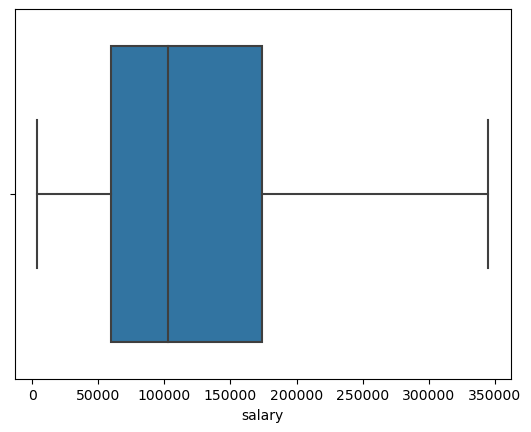

In [23]:
sns.boxplot(x=df["salary"])

<AxesSubplot:>

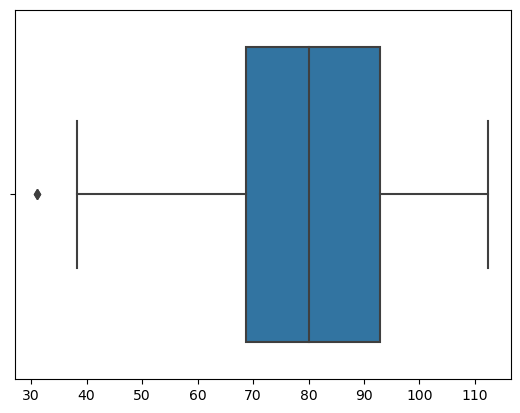

In [24]:
array1=yeojohnson(df["salary"])
sns.boxplot(x=array1[0])

<AxesSubplot:xlabel='salary_in_usd'>

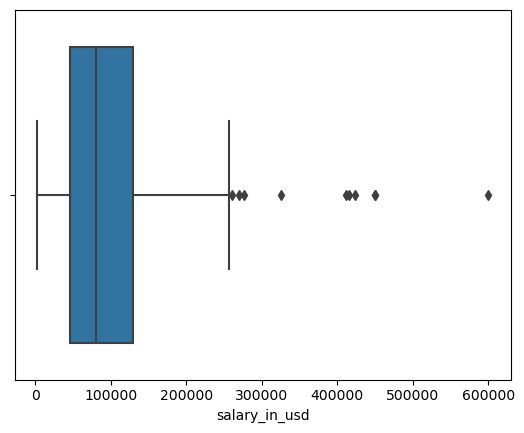

In [25]:
sns.boxplot(x=df["salary_in_usd"])

In [26]:
df['salary'].skew()

1.0207116041386979

In [27]:
x=df.drop(['salary_in_usd'],axis=1)
y=df['salary_in_usd']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size = 0.2,
                                                    shuffle=True, random_state=10)

In [29]:
linear_reg=LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression()

In [30]:
train_score = linear_reg.score(x_train, y_train)
print("Training R-Squared Value :", train_score)

test_score = linear_reg.score(x_test, y_test)
print("Testing R-Squared Value :", test_score)

Training R-Squared Value : 0.9659495132811137
Testing R-Squared Value : 0.7162288300470572


In [31]:
Lasso_model=Lasso(alpha=1.0)
Lasso_model.fit(x_train,y_train)


Lasso()

In [32]:
ridg_model=Ridge(alpha=1)
ridg_model.fit(x_train,y_train)

Ridge(alpha=1)

In [33]:
Lasso_model=Lasso(alpha=1.9080000000000017)
Lasso_model.fit(x_train,y_train)

Lasso(alpha=1.9080000000000017)

In [34]:
df.shape

(245, 151)

In [35]:
y_pred_train = Lasso_model.predict(x_train)

MSE = mean_squared_error(y_train , y_pred_train)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train , y_pred_train)
print("R-Squared Value is :",r_squared)

n = x_train.shape[0]
k = x_train.shape[1]

adj_r2 = 1 - (((1- r_squared) * (n - 1))/(n - k - 1))
print("Adjusted R-squared value :",adj_r2)

MSE : 203726514.06622744
RMSE : 14273.279723533322
MAE : 5712.707464603595
R-Squared Value is : 0.9658939081331321
Adjusted R-squared value : 0.8522069352435726


In [36]:
# Testing Data Evaluation

y_pred = Lasso_model.predict(x_test)

MSE = mean_squared_error(y_test , y_pred)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

mae = mean_absolute_error(y_test , y_pred)
print("MAE :",mae)

r_squared = r2_score(y_test , y_pred)
print("R-Squared Value is :",r_squared)

n = x_test.shape[0]
k = x_test.shape[1]

adj_r2 = 1 - (((1- r_squared) * (n - 1))/(n - k - 1))
print("Adjusted R-squared value :",adj_r2)

MSE : 3043361152.809127
RMSE : 55166.6670445943
MAE : 24577.167886917414
R-Squared Value is : 0.7244192725072239
Adjusted R-squared value : 1.1296850482318945


In [37]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [38]:
lasso_reg_model = Lasso(alpha=1) # estimators

param_grid = {"alpha" : np.arange(0.05, 2, 0.001)}

gscv_lasso_model = GridSearchCV(lasso_reg_model, param_grid, cv = 5)
gscv_lasso_model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=1),
             param_grid={'alpha': array([0.05 , 0.051, 0.052, ..., 1.997, 1.998, 1.999])})

In [39]:
gscv_lasso_model.best_params_

{'alpha': 1.9990000000000017}

In [40]:
lasso_reg_model = Lasso(alpha=1) # estimators

param_grid = {"alpha" : np.arange(0.05, 2, 0.001)}

gscv_lasso_model = RandomizedSearchCV(lasso_reg_model, param_grid, cv = 5)
gscv_lasso_model.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=Lasso(alpha=1),
                   param_distributions={'alpha': array([0.05 , 0.051, 0.052, ..., 1.997, 1.998, 1.999])})

In [41]:
y_pred_train = gscv_lasso_model.predict(x_train)

MSE = mean_squared_error(y_train , y_pred_train)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

mae = mean_absolute_error(y_train , y_pred_train)
print("MAE :",mae)

r_squared = r2_score(y_train , y_pred_train)
print("R-Squared Value is :",r_squared)

n = x_train.shape[0]
k = x_train.shape[1]

adj_r2 = 1 - (((1- r_squared) * (n - 1))/(n - k - 1))
print("Adjusted R-squared value :",adj_r2)

MSE : 203706298.594692
RMSE : 14272.571548067011
MAE : 5706.882964771176
R-Squared Value is : 0.9658972924286544
Adjusted R-squared value : 0.8522216005241691


In [42]:
y_pred = gscv_lasso_model.predict(x_test)

MSE = mean_squared_error(y_test , y_pred)
print("MSE :",MSE)

RMSE = np.sqrt(MSE)
print("RMSE :",RMSE)

mae = mean_absolute_error(y_test , y_pred)
print("MAE :",mae)

r_squared = r2_score(y_test , y_pred)
print("R-Squared Value is :",r_squared)

n = x_test.shape[0]
k = x_test.shape[1]

adj_r2 = 1 - (((1- r_squared) * (n - 1))/(n - k - 1))
print("Adjusted R-squared value :",adj_r2)

MSE : 3043620050.9030333
RMSE : 55169.01350308009
MAE : 24586.82494061999
R-Squared Value is : 0.7243958289126313
Adjusted R-squared value : 1.129696080511703


In [43]:
import pickle
import json

In [44]:
with open(r'artifacts/gscv_lasso_model.pkl','wb') as f:
    pickle.dump(gscv_lasso_model, f)

In [45]:
gscv_lasso_model.n_features_in_

150

In [46]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'salary',
       'salary_in_usd', 'remote_ratio', 'company_size',
       'job_title_3D Computer Vision Researcher', 'job_title_AI Scientist',
       'job_title_Applied Data Scientist',
       ...
       'company_location_PK', 'company_location_PL', 'company_location_PT',
       'company_location_RU', 'company_location_SG', 'company_location_SI',
       'company_location_TR', 'company_location_UA', 'company_location_US',
       'company_location_VN'],
      dtype='object', length=151)

In [47]:
column_names = x.columns

project_data = {"Column Names" : column_names.tolist(),
                "work_year" : {'2021e': 2021, '2020': 2020},
                "experience_level":{'MI': 103, 'SE': 77, 'EN': 54, 'EX': 11},
                "employment_type":{'FT': 231, 'PT': 7, 'CT': 4, 'FL': 3},
                "company_size":{'L': 132, 'S': 58, 'M': 55}}

with open(r'artifacts/project_data.json','w') as f:
    json.dump(project_data, f)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Columns: 151 entries, work_year to company_location_VN
dtypes: float64(1), int64(6), uint8(144)
memory usage: 48.0 KB
